There are 18249 responses
Percentage of total volume numbers starting with '1': 45.9%
Percentage of total volume numbers starting with '2': 30.59%
Percentage of total volume numbers starting with '3': 23.22%
Percentage of total volume numbers starting with '4': 17.25%
Percentage of total volume numbers starting with '5': 14.86%
Percentage of total volume numbers starting with '6': 14.11%
Percentage of total volume numbers starting with '7': 11.74%
Percentage of total volume numbers starting with '8': 10.52%
Percentage of total volume numbers starting with '9': 8.94%


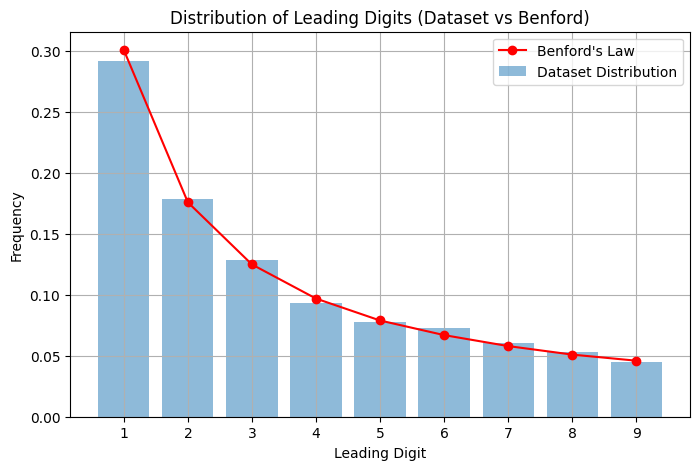

In [143]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv(io.BytesIO(open('avocado.csv', 'rb').read()))

df['Total Volume'] = df['Total Volume'].astype('str')

df.dataframeName = 'avocado.csv'
nRow, nCol = df.shape
print(f'There are {nRow} responses')

# Filter the column for total volume numbers

# Convert 'Total Volume' column to string type
df['Total Volume'] = df['Total Volume'].astype('str')

# Dictionary to store percentages for each digit from 1 to 9
percentage_by_digit = {}

# Calculate percentage for each digit from 1 to 9
for digit in range(1, 10):
    digit_str = str(digit)

    # Filter rows containing the digit
    total_volume = df['Total Volume'].str.contains(digit_str, na=False)

    # Calculate percentage of numbers starting with the current digit
    total_volume_starting_with_digit = df[total_volume]['Total Volume'].str.startswith(digit_str).sum()
    percentage_starting_with_digit = (total_volume_starting_with_digit / total_volume.sum()) * 100

    # Store the percentage in the dictionary
    percentage_by_digit[digit_str] = round(percentage_starting_with_digit, 2)

# Display percentages for each digit
for digit, percentage in percentage_by_digit.items():
    print(f"Percentage of total volume numbers starting with '{digit}': {percentage}%")

#Here we have put out the perfcentages for each number. Now we will show the distribution follows Benford's law

leading_digits = df['Total Volume'].str[0]
distribution = leading_digits.value_counts(normalize=True).sort_index()

# Benford's Law distribution for comparison
benford_distribution = pd.Series([0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046],
                                 index=[str(i) for i in range(1, 10)])

# Plotting the distributions
plt.figure(figsize=(8, 5))

plt.bar(distribution.index, distribution.values, alpha=0.5, label='Dataset Distribution')
plt.plot(benford_distribution.index, benford_distribution.values, color='red', marker='o', linestyle='-', label="Benford's Law")

plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title('Distribution of Leading Digits (Dataset vs Benford)')
plt.legend()
plt.grid(True)
plt.show()






# New Section